In [1]:
!pip install psycopg2
!pip install sqlalchemy

# 1. PostgreSQL
1.	Please make SQL queries to answer these questions and post them on your Github account!

        a.	A customer wants to know the films about “astronaut”. How many recommendations could you give for him?
   
       b.	I wonder, how many films have a rating of “R” and a replacement cost between $5 and 15?
    
    c.	We have two staff members with staff IDs 1 and 2. We want to give a bonus to the staff member that handled the most payments. How many payments did each staff member handle? And how much was the total amount processed by each staff member?
    
    d.	Corporate headquarters is auditing the store, they want to know the average replacement cost of movies by rating
    
    e.	We want to send coupons to the 5 customers who have spent the most amount of money. Get the customer name, email and their spent amount!
    
    f.	We want to audit our stock of films in all of our store. How many copies of each movie in each store do we have?
    
    g.	We want to know what customers are eligible for our platinum credit card. The requirements are that the customer has at least a total of 40 transaction payments. Get the customer name, email who are eligible for the credit card!


In [2]:
import psycopg2
from pandas import DataFrame
databases = psycopg2.connect(user = "postgres",
                              password ='123qweasd',
                              host = "127.0.0.1",
                              port = "5432",
                              database = "dvdrental")

In [3]:
connection = databases.cursor()

a.	A customer wants to know the films about “astronaut”. How many recommendations could you give for him?

In [10]:
#Koneksikan script dengan database
connection = databases.cursor()
#Eksekusi kode untuk melihat semua isi tabel
connection.execute("select count(film_id) from film where description like '%Astronaut%'")
myresult = connection.fetchall()

for x in myresult:
  print(f"There are {x[0]} film recommendations about astronaut")

There are 78 film recommendations about astronaut


b.	I wonder, how many films have a rating of “R” and a replacement cost between $5 and 15?

In [11]:
#Koneksikan script dengan database
connection = databases.cursor()
#Eksekusi kode untuk melihat semua isi tabel
connection.execute("select count(film_id) from film where rating = 'R' and replacement_cost between 5 and 15")
myresult = connection.fetchall()

for x in myresult:
  print(f"the numbers of film which has a rating of 'R' and a replacement cose between $5 and $15 are: {x[0]}")

the numbers of film which has a rating of 'R' and a replacement cose between $5 and $15 are: 52


c.	We have two staff members with staff IDs 1 and 2. We want to give a bonus to the staff member that handled the most payments. How many payments did each staff member handle? And how much was the total amount processed by each staff member?

In [27]:
connection = databases.cursor()
#Eksekusi kode untuk melihat semua isi tabel
connection.execute("select username, staff_id, sum(amount) total_amount, count(payment_id ) total_handle from (select s.first_name, s.username, p.amount, p.payment_id , s.staff_id from payment p full outer join staff s on p.staff_id = s.staff_id order by s.username) table1 group by username, staff_id ")
myresult = connection.fetchall()
df = DataFrame(myresult)
df.columns = ['username','staff_id','total_amout','total_handle']
print('The result of payments did each staff member handle:')
df

The result of payments did each staff member handle:


,username,staff_id,total_amout,total_handle
0,Jon,2,31059.92,7304
1,Mike,1,30252.12,7292


<BarContainer object of 2 artists>

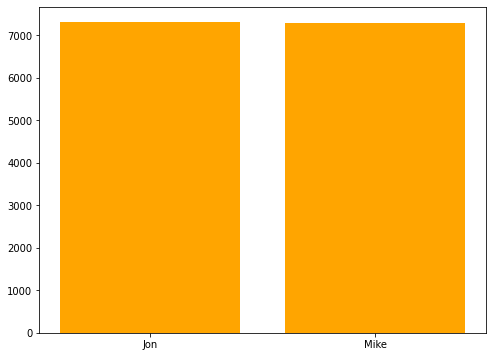

In [29]:
x = df['username']
y = df['total_handle']
ax, fig = plt.subplots(figsize = (8,6))
plt.bar(x,y, color = 'orange')

Conclution: 
1. Jon handle 7,304 payments. He is more than high Mike who handle 7,292 payments.
2. Jon has total 31,059.92 amounts. He is more than high Mike who has 30,252.12 amounts. 
3. So, we can conclude that the staff who deserve bonus is Jon. Because Jon has the highest total of amount and payments handle

d. Corporate headquarters is auditing the store, they want to know the average replacement cost of movies by rating

In [8]:
from sqlalchemy import create_engine
connection = databases.cursor()
#Eksekusi kode untuk melihat semua isi tabel
connection.execute("select store_id, rating, sum(replacement_cost)/count(replacement_cost) as mean_replacement_cost from (select i.store_id, f.rating, replacement_cost from film f right join inventory i on i.film_id = f.film_id) g group by rating,store_id order by store_id ")
myresult = connection.fetchall()
df = DataFrame(myresult)
df.columns =['store_id','rating','avg_replacement_cost']
print('This is the average replacement cost of movies by rating in each store_id: ')
df

This is the average replacement cost of movies by rating in each store_id: 


,store_id,rating,avg_replacement_cost
0,1,PG,19.3481081081081081
1,1,NC-17,20.3211827956989247
2,1,PG-13,20.4738095238095238
3,1,R,20.8271040723981900
4,1,G,20.8402538071065990
5,2,NC-17,20.2071189979123173
6,2,R,20.1155411255411255
7,2,G,20.0857178841309824
8,2,PG,19.0941666666666667
9,2,PG-13,20.9007505070993915


e. We want to send coupons to the 5 customers who have spent the most amount of money. Get the customer name, email and their spent amount!

In [33]:
connection = databases.cursor()
#Eksekusi kode untuk melihat semua isi tabel
connection.execute("select concat(first_name,' ',last_name)as name,email, sum(amount) total_amount from (select c.customer_id, c.first_name,c.last_name, c.email, p.amount from customer c full outer join payment p on c.customer_id = p.customer_id order by p.amount desc)table2 group by email, first_name, last_name order by total_amount desc limit 5")
myresult = connection.fetchall()
df = DataFrame(myresult)
df.columns = ['name','email','total_amount']
df

,name,email,total_amount
0,Eleanor Hunt,eleanor.hunt@sakilacustomer.org,211.55
1,Karl Seal,karl.seal@sakilacustomer.org,208.58
2,Marion Snyder,marion.snyder@sakilacustomer.org,194.61
3,Rhonda Kennedy,rhonda.kennedy@sakilacustomer.org,191.62
4,Clara Shaw,clara.shaw@sakilacustomer.org,189.60


<BarContainer object of 5 artists>

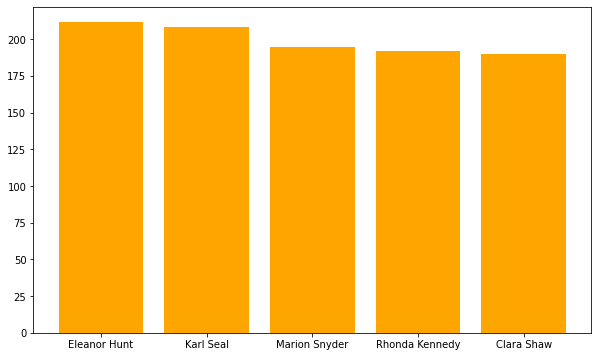

In [25]:
import matplotlib.pyplot as plt
x = df['name']
y = df['total_amount']
ax, fig = plt.subplots(figsize = (10,6))
plt.bar(x,y, color = 'orange')

f. We want to audit our stock of films in all of our store. How many copies of each movie in each store do we have?

In [30]:
connection = databases.cursor()
#Eksekusi kode untuk melihat semua isi tabel
connection.execute("select store_id, sum(film_id) as copies from inventory i group by store_id")
myresult = connection.fetchall()
df = DataFrame(myresult)
df.columns = ['store_id','copies']
print('This is the total copy movies in each store_id:')
df

This is the total copy movies in each store_id:


,store_id,copies
0,1,1141550
1,2,1153239


In [40]:
connection = databases.cursor()
#Eksekusi kode untuk melihat semua isi tabel
connection.execute("select f.title,i.store_id, sum(i.film_id) as copies from inventory i left join film f on i.film_id = f.film_id group by store_id, title order by copies limit 10")
myresult = connection.fetchall()
df = DataFrame(myresult)
df.columns = ['title','store_id','copies']
print('This is the copies of each movie in each store that we have only 10 limitation:')
df.to_csv('copies_each_store_title.csv', index = False)
df

This is the copies of each movie in each store that we have only 10 limitation:


,title,store_id,copies
0,Academy Dinosaur,2,4
1,Academy Dinosaur,1,4
2,Ace Goldfinger,2,6
3,Affair Prejudice,2,12
4,Adaptation Holes,2,12
5,Airplane Sierra,1,14
6,African Egg,2,15
7,Affair Prejudice,1,16
8,Agent Truman,1,18
9,Agent Truman,2,18


To see complete data please download in here. https://github.com/ronnyfahrudin/IYKRA-FELLOWSHIP-Data-Science/blob/master/Project%20Coding/copies_each_store_title.csv

g.	We want to know what customers are eligible for our platinum credit card. The requirements are that the customer has at least a total of 40 transaction payments. Get the customer name, email who are eligible for the credit card!

In [30]:
connection = databases.cursor()
#Eksekusi kode untuk melihat semua isi tabel
connection.execute("select name, email, transactions from (select concat(c.first_name,' ' , c.last_name) as name,email, count(p.payment_id) transactions, c.customer_id from customer c full outer join payment p on c.customer_id = p.customer_id group by c.customer_id) t where transactions >= 40")
myresult = connection.fetchall()

df = DataFrame(myresult)
df.columns = ['name','email','total_payment']
print('So, there 3 eligible customers to get platinum credit card. this is it: ')
df

So, there 3 eligible customers to get platinum credit card. this is it: 


,name,email,total_payment
0,Clara Shaw,clara.shaw@sakilacustomer.org,40
1,Karl Seal,karl.seal@sakilacustomer.org,42
2,Eleanor Hunt,eleanor.hunt@sakilacustomer.org,45


<BarContainer object of 3 artists>

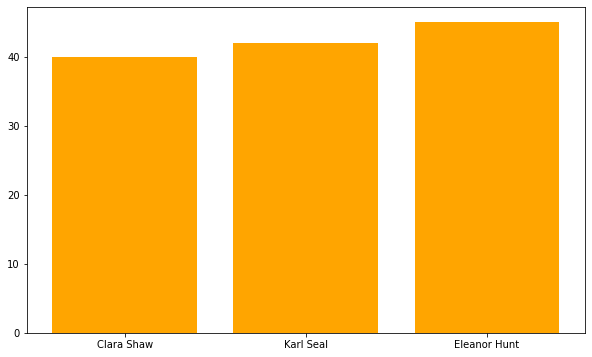

In [31]:
x = df['name']
y = df['total_payment']
ax, fig = plt.subplots(figsize = (10,6))
plt.bar(x,y, color = 'orange')

# 2 Python
2. Please make a python function that introduce your name, address, date of birth, and print them out into one sentence!

Example:


In [35]:
name = str(input("Input name: "))
Adress = str(input("Input Adress: "))
dob = input('input D.O.B:')
print()
print(f"My name is {name}, I live in {Adress}, I was born on {dob}.")

Input name: Ronny
Input Adress: Boyolali, Central Java
input D.O.B:November 14, 1996

My name is Ronny, I live in Boyolali, Central Java, I was born on November 14, 1996.


In [33]:
def intro(name,Adress,dob):
    print(f"My name is {name}, I live in {Adress}, I was born on {dob}.")
intro("Ronny", "Boyolali Jawa Tengah","Nov 14, 1996")

My name is Ronny, I live in Boyolali Jawa Tengah, I was born on Nov 14, 1996.
